<a href="https://www.kaggle.com/code/hazalyl/proje-final?scriptVersionId=145731694" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Life Expectancy Analysis (Beklenen Yaşam Süresi Analizi)

 * Verinin Genel Yapısının İncelenmesi

In [1]:
import pandas as pd
import numpy as np

Data Description:

The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. It has been observed that in the past 15 years, there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.

In [2]:
df = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# "Country", "Year" ve "Status" değişkenleri kategorik değişkenler
df['Year'] = df['Year'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Status'] = df['Status'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   category
 2   Status                           2938 non-null   category
 3   Life expectancy                  2928 non-null   float64 
 4   Adult Mortality                  2928 non-null   float64 
 5   infant deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10   BMI                             2904 non-null   float64 
 11  under-five deaths                2938 non-null   int64   
 12  Polio 

In [7]:
# veri seti kaç farklı ülkenin verilerini içeriyor?
df['Country'].nunique()

193

In [8]:
df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Palau                     1
Niue                      1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [9]:
print(np.unique(df["Country"]))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [10]:
# bu veriler hangi yıllarda toplanmış ?
df['Year'].value_counts()

Year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
Name: count, dtype: int64

In [11]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

#### Bu analizde amacım time-series analizi yapmak değil, üklelerin farklı sosyo-ekonomik değişkenlerinin beklenen yaşam süresini nasıl etkilediğini görmek. Ayrıca veride her ülke için her yıl kayıt tutulmamış.

In [12]:
# summary statiscs ve değişkenlerin tanımı

df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


* *The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). *

* *The risk of a child dying before completing the first year of age was highest in the WHO African Region (52 per 1000 live births), over seven times higher than that in the WHO European Region (7 per 1000 live births).*

* *The under-five mortality rate refers to the probability a newborn would die before reaching exactly 5 years of age, expressed per 1,000 live births.*

* *Measles = kızamık*

* *Diphtheria = difteri*

* *Polio = çocuk felci*

* *thinness 1-19 years: Prevalence of  thinness among children and adolescents (thinness is considered a marker of malnutrition)*

* *thinness 5-9 years: Prevalence of thinness among children*

* *(Income Composition of Resources) measures how good a country is at utilizing its resources. ICOR is graded between 0 to 1, and higher ICOR indicates optimal utilization of available resources. ICOR has a considerably high correlation with life expectancy.*

**NA Değerler**

In [13]:
# veride NA değerler var mı?
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
# verideki NA değerlerin yüzdesi ne?
(df.isnull().sum() / len(df)) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [15]:
# NA değer içeren verilerin subset'i

subset_na = df[df.isna().any(axis=1)]

subset_na.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9


In [16]:
subset_na.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2903,Yemen,2002,Developing,61.5,25.0,45,0.07,0.000000,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9
2905,Yemen,2000,Developing,68.0,252.0,48,0.07,0.000000,14.0,0,...,74.0,4.14,74.0,0.1,NaN,NaN,14.1,14.1,0.436,7.7
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3


Data Description Note: 
> 
> On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. **The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset.** 

NA verilerin geldiği ülkeler gelişmekte olan ve az bilinen ülkeler olduğu için ve veride gelişmiş ülkeler de olduğu herhangi bir imputation metodu kullanmak bize çok doğru olmayan analiz sonuçları verebilir. Bu yüzden verideki NA değerlerini veriden çıkarmayı tercih ediyorum.

In [17]:
df = df.dropna()

df.shape

(1649, 22)

In [18]:
df["Country"].nunique()

133

In [19]:
df["Country"].value_counts()

Country
Afghanistan                         16
Albania                             16
Jordan                              15
Maldives                            15
Malaysia                            15
                                    ..
Nauru                                0
Monaco                               0
Micronesia (Federated States of)     0
Brunei Darussalam                    0
Libya                                0
Name: count, Length: 193, dtype: int64

In [20]:
# observation sayısı 0 olan kategorileri silmek
categorical_columns = df.select_dtypes(include='category').columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.remove_unused_categories())

In [21]:
df["Country"].value_counts()

Country
Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: count, Length: 133, dtype: int64

* ### EDA

In [22]:
import matplotlib.pyplot as plt

df.rename(columns={" BMI ":"BMI",
                   "Life expectancy ":"Life expectancy",
                   "Measles ":"Measles",
                   "Diphtheria ":"Diphtheria",
                   " HIV/AIDS":"HIV/AIDS",
                   " thinness  1-19 years":"thinness  1-19 years",
                   " thinness 5-9 years":"thinness 5-9 years",
                  "under-five deaths ": "under five deaths"},inplace=True)

* Yıllar içinde beklenen yaşam süresi nasıl bir trende sahip?

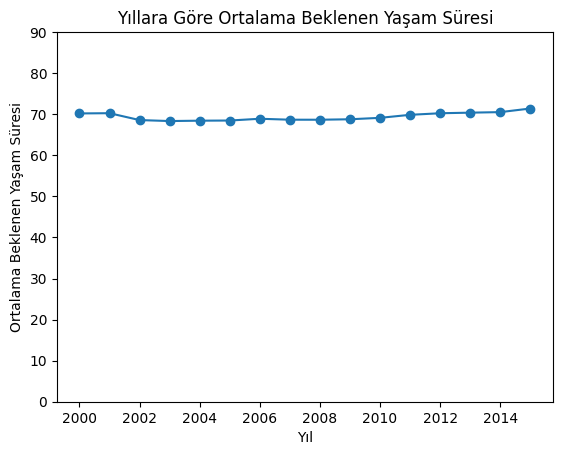

In [23]:
# veriyi yıllara göre gruplayıp, ortalama yaşam süresini bulma

yearly_avg_le = df.groupby('Year')['Life expectancy'].mean()

# line plot

plt.plot(yearly_avg_le.index, yearly_avg_le.values, marker='o')
plt.title('Yıllara Göre Ortalama Beklenen Yaşam Süresi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Beklenen Yaşam Süresi')
plt.ylim(0, 90)

plt.show()

Yıllara göre ortalama beklenen yaşam süresi grafiğine baktığımızda, göze çarpan bir değişiklik göremiyoruz. Örneğin 2002 yılında ufak düşüş yaşanmış ama grafiğin genel trendine baktığımızda ortalama beklenen yaşam süresinin 2000-2015 yılları arasında 70 yıl civarında olduğunu söyleyebiliriz.

* Hangi ülkeler en yüksek ortalama beklenen yaşam süresine sahip?

In [24]:
# veriyi ülkeye göre gruplayıp, ortalama yaşam süresini bulma
country_avg_le = df.groupby('Country')['Life expectancy'].mean()

# en yüksek ortalamaya sahip ülkeler
country_avg_le_top5 = country_avg_le.sort_values(ascending=False).head(5)

country_avg_le_top5

Country
Ireland    83.440000
Canada     82.233333
France     82.206667
Italy      82.153333
Spain      82.020000
Name: Life expectancy, dtype: float64

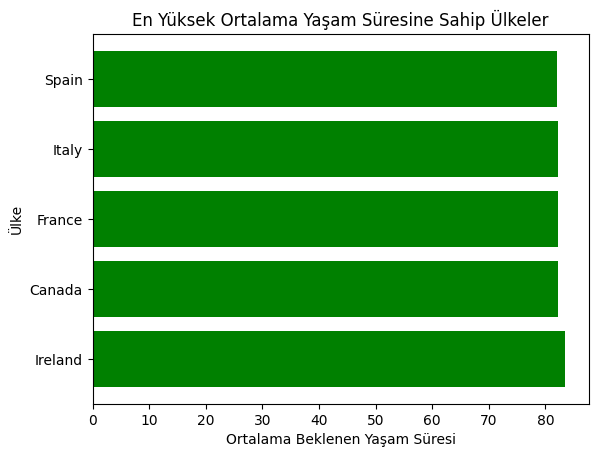

In [25]:
#bar chart
plt.barh(country_avg_le_top5.index, country_avg_le_top5.values, color='green')
plt.title('En Yüksek Ortalama Yaşam Süresine Sahip Ülkeler')
plt.ylabel('Ülke')
plt.xlabel('Ortalama Beklenen Yaşam Süresi')

plt.show()

* Hangi ülkeler en düşük ortalama beklenen yaşam süresine sahip?

In [26]:
# en düşük ortalamaya sahip ülkeler
country_avg_le_bottom5 = country_avg_le.sort_values().head(5)

country_avg_le_bottom5

Country
Sierra Leone    48.425000
Lesotho         48.608333
Zimbabwe        49.386667
Malawi          50.261538
Angola          50.675000
Name: Life expectancy, dtype: float64

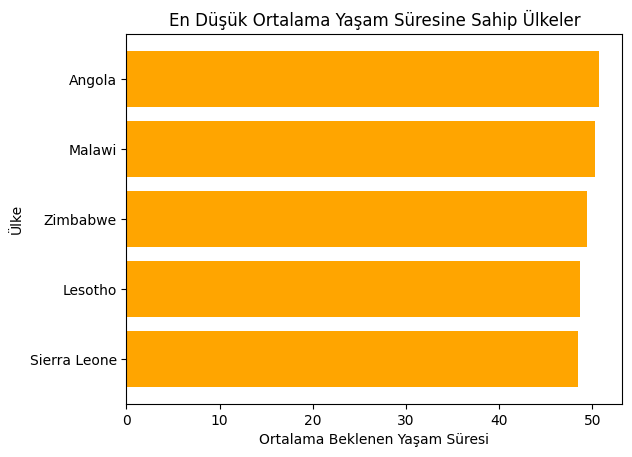

In [27]:
#bar chart
plt.barh(country_avg_le_bottom5.index, country_avg_le_bottom5.values, color='orange')
plt.title('En Düşük Ortalama Yaşam Süresine Sahip Ülkeler')
plt.ylabel('Ülke')
plt.xlabel('Ortalama Beklenen Yaşam Süresi')

plt.show()

* Hangi ülkeler en yüksek GDP'ye sahip? (Her ülkenin 2000-2015 yılları arasındaki ortalma GDP'sine göre)

In [28]:
country_avg_gdp = df.groupby('Country')['GDP'].mean()

# en yüksek ortalamaya sahip ülkeler
country_avg_gdp_top5 = country_avg_gdp.sort_values(ascending=False).head(5)

country_avg_gdp_top5

Country
Luxembourg     56727.492103
Netherlands    39640.341955
Australia      35391.195154
Austria        33171.578263
Sweden         32232.377078
Name: GDP, dtype: float64

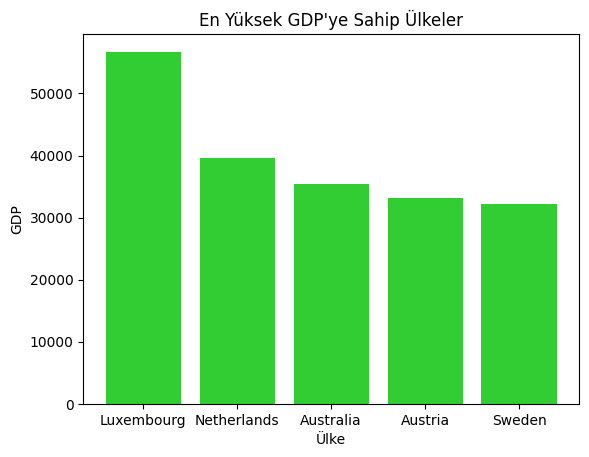

In [29]:
# bar chart
plt.bar(country_avg_gdp_top5.index, country_avg_gdp_top5.values, color='LimeGreen')
plt.title("En Yüksek GDP'ye Sahip Ülkeler")
plt.xlabel('Ülke')
plt.ylabel('GDP')

plt.show()

* GDP ile beklenen yaşam süresi arasında bir korelasyon var mı?

In [30]:
# correlation coefficient
r = df['GDP'].corr(df['Life expectancy'])

print(f"GDP ile beklenen yaşam süresi arasındaki correlation coefficient: {r:.2f}")


GDP ile beklenen yaşam süresi arasındaki correlation coefficient: 0.44


* Heatmap

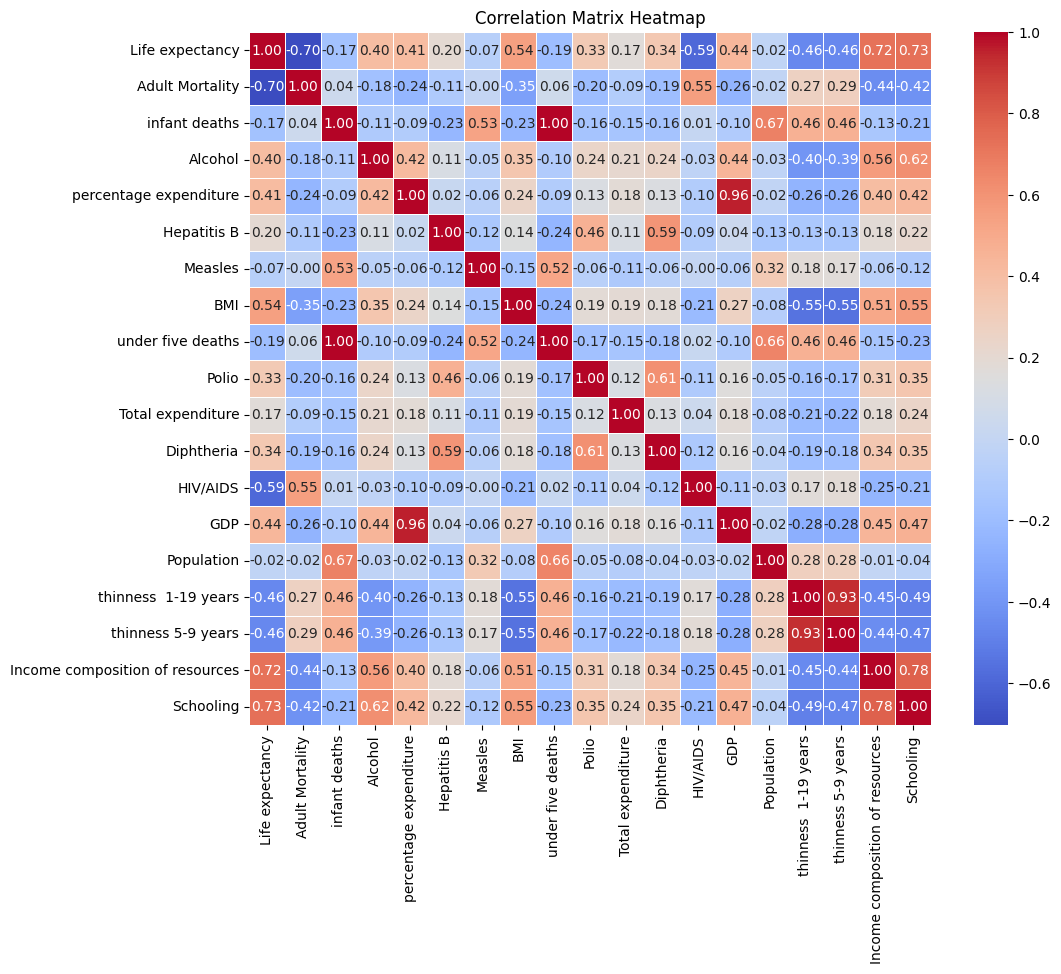

In [31]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['number']) # numeric değişkenler
correlation_matrix = numeric_df.corr()

#heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Heatmap'ten görebilidiğimiz üzere beklenen yaşam süresi ile arasında kayda değer korelasyon olan üç değişken var: adult mortality, ICR, ve schooling. Bu üç değişken ile beklenen yaşam süresi arasında doğrusal pozitif ilişki olduğunu görüyoruz(correlation coeff > 0).

* Gelişmiş ve gelişmekte olan ülkelerin ortalama beklenen yaşam süreleri arasında bir fark var mı?

In [32]:
average_le_status = df.groupby('Status')['Life expectancy'].mean()
average_le_status

Status
Developed     78.691736
Developing    67.687349
Name: Life expectancy, dtype: float64

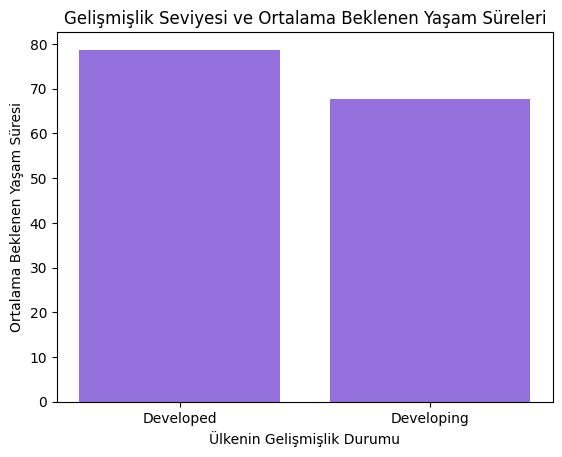

In [33]:
plt.bar(average_le_status.index, average_le_status.values, color='MediumPurple')
plt.title("Gelişmişlik Seviyesi ve Ortalama Beklenen Yaşam Süreleri")
plt.xlabel('Ülkenin Gelişmişlik Durumu')
plt.ylabel('Ortalama Beklenen Yaşam Süresi')

plt.show()

* #### Modelleme (KNN)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# modelleme kısmında country ve year değişkenlerine ihtiyacımız olmayacak
columns_to_drop = ['Country', 'Year']

model_df = df.drop(columns=columns_to_drop, axis=1)

# one-hot encoding
df_encoded = pd.get_dummies(model_df, columns=['Status'])

# Concatenate the encoded DataFrame with the original DataFrame
df_combined = pd.concat([model_df, df_encoded], axis=1)


df_combined = df_combined.drop("Status", axis=1)

In [36]:
x = df_combined.drop('Life expectancy', axis=1)

y = df_combined['Life expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=94)

In [37]:
knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(x_train,y_train) # KNN model

y_pred = knn_model.predict(x_test) # kurduğumuz model ile elde ettiğimiz prediction değerleri

In [38]:
# modelin ne kadar iyi çalıştığını ölçmek için MAE, MSE, and RMSE gibi değerlere bakacağız
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 6.29
Mean Squared Error (MSE): 63.87
Root Mean Squared Error (RMSE): 7.99


MAE ve RMSE değerlerinin düşük olması, modelin accuracy'sinin yüksek olduğu anlamına gelir.